<a href="https://colab.research.google.com/github/vincent-grari/DIVERS/blob/main/TP3_Univ_LeMans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

#Importer le fichier csv : 
data = pd.read_csv("data.csv")
data.head()
data.dtypes

#Convertir au bon format les donnÃƒÂ©es : 
data['Date'] = pd.to_datetime(data['Date'])
data['Close'] = pd.to_numeric(data['Close'], downcast='float')

#Appliquer la date en index et trier : 
data.set_index('Date',inplace=True)
data.info()
data.sort_index(inplace=True)

#Extraire uniquement le prix de clÃƒÂ´ture : 
data_close = data['Close']
data_close = data_close.values.reshape(len(data_close), 1)
plt.plot(data_close)
plt.show()

#Appliquer une normalisation Ã‚Â« min-max Ã‚Â» de faÃƒÂ§on Ãƒ  avoir les valeurs de 
#lÃ¢â‚¬â„¢action comprises entre 0 et 1 :
scaler = MinMaxScaler(feature_range=(0,1))
data_close = scaler.fit_transform(data_close)
data_close

#split data into train and test
train_size = int(len(data_close)* 0.7)
test_size = len(data_close) - train_size

#CrÃƒÂ©er la base dÃ¢â‚¬â„¢entrainement et de test : 
#A noter que nous prenons par dÃƒÂ©faut 70% de la data de faÃƒÂ§on temporelle (non alÃƒÂ©atoire)
data_train, data_test = data_close[0:train_size, :], data_close[train_size:len(data_close), :]
print('Split data into train and test: ', len(data_train), len(data_test))

def create_ts(ds, series):
    X, Y =[], []
    for i in range(len(ds)-series - 1):
        item = ds[i:(i+series), 0]
        X.append(item)
        Y.append(ds[i+series, 0])
    return np.array(X), np.array(Y)

series = 14
 
trainX, trainY = create_ts(data_train, series)
testX, testY = create_ts(data_test, series)

print(trainX.shape)
# reshape pour le format LSTM 
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(trainX.shape)

# PrÃƒÂ©diction avec le modÃƒÂ¨le LSTM :
model = Sequential()

model.add(LSTM(units=4, input_shape=(series,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=32)

# Evaluation du modÃƒÂ¨le :
trainPredictions = model.predict(trainX)
testPredictions = model.predict(testX)
trainPredictions = scaler.inverse_transform(trainPredictions)
testPredictions = scaler.inverse_transform(testPredictions)
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

trainScore = mean_squared_error(trainY[0], trainPredictions[:, 0])
testScore = mean_squared_error(testY[0], testPredictions[:, 0])
print('Train score: %.2f rmse', trainScore)
print('Test score: %.2f rmse', testScore)

# Affichage des graphiques :
train_plot = np.empty_like(data_close)
train_plot[:,:] = np.nan
train_plot[series:len(trainPredictions)+series, :] = trainPredictions

test_plot = np.empty_like(data_close)
test_plot[:,:] = np.nan
test_plot[len(trainPredictions)+(series*2)+1:len(data_close)-1, :] = testPredictions

plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1464 entries, 2016-12-01 to 2020-12-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1464 non-null   float64
 1   High       1464 non-null   float64
 2   Low        1464 non-null   float64
 3   Close      1464 non-null   float32
 4   Adj Close  1464 non-null   float64
 5   Volume     1464 non-null   int64  
dtypes: float32(1), float64(4), int64(1)
memory usage: 74.3 KB


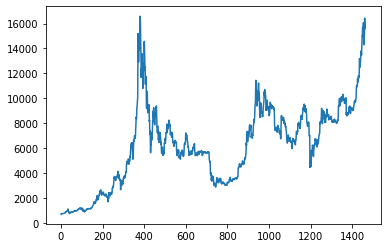

Split data into train and test:  1024 440
(1016, 7)
(1016, 7, 1)
compilation time :  0.007448434829711914
Epoch 1/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0415
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 6/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 9/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 10/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 11/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 12/100

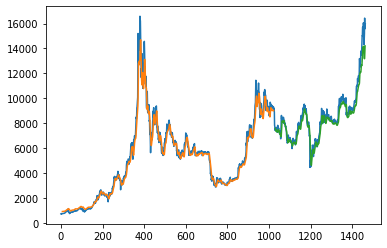

In [ ]:
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

#Importer le fichier csv : 
data = pd.read_csv("http://grari.fr/tp3/BTC-EUR.csv")
data.head()
data.dtypes

#Convertir au bon format les donnÃ©es : 
data['Date'] = pd.to_datetime(data['Date'])
data['Close'] = pd.to_numeric(data['Close'], downcast='float')

#Appliquer la date en index et trier : 
data.set_index('Date',inplace=True)
data.info()
data.sort_index(inplace=True)

#Extraire uniquement le prix de clÃ´ture : 
data_close = data['Close']
data_close = data_close.values.reshape(len(data_close), 1)
plt.plot(data_close)
plt.show()

#Appliquer une normalisation Â« min-max Â» de faÃ§on Ã  avoir les valeurs de 
#lâ€™action comprises entre 0 et 1 :
scaler = MinMaxScaler(feature_range=(0,1))
data_close = scaler.fit_transform(data_close)
data_close

#split data into train and test
train_size = int(len(data_close)* 0.7)
test_size = len(data_close) - train_size

#CrÃ©er la base dâ€™entrainement et de test : 
#A noter que nous prenons par dÃ©faut 70% de la data de faÃ§on temporelle (non alÃ©atoire)
data_train, data_test = data_close[0:train_size, :], data_close[train_size:len(data_close), :]
print('Split data into train and test: ', len(data_train), len(data_test))

def create_ts(ds, series):
    X, Y =[], []
    for i in range(len(ds)-series - 1):
        item = ds[i:(i+series), 0]
        X.append(item)
        Y.append(ds[i+series, 0])
    return np.array(X), np.array(Y)

series = 7
 
trainX, trainY = create_ts(data_train, series)
testX, testY = create_ts(data_test, series)

print(trainX.shape)
# reshape pour le format LSTM 
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(trainX.shape)

# PrÃ©diction avec le modÃ¨le LSTM :
model = Sequential()

model.add(LSTM(
        units=30,
        input_dim=1,
    return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(
        units=30,
        input_dim=1,
    return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(
    30,
    return_sequences=False))
model.add(Dropout(0.1))

model.add(Dense(1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

model.fit(trainX, trainY, epochs=200, batch_size=64)

# Evaluation du modÃ¨le :
trainPredictions = model.predict(trainX)
testPredictions = model.predict(testX)
trainPredictions = scaler.inverse_transform(trainPredictions)
testPredictions = scaler.inverse_transform(testPredictions)
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

trainScore = mean_squared_error(trainY[0], trainPredictions[:, 0])
testScore = mean_squared_error(testY[0], testPredictions[:, 0])
print('Train score: %.2f rmse', trainScore)
print('Test score: %.2f rmse', testScore)

# Affichage des graphiques :
train_plot = np.empty_like(data_close)
train_plot[:,:] = np.nan
train_plot[series:len(trainPredictions)+series, :] = trainPredictions

test_plot = np.empty_like(data_close)
test_plot[:,:] = np.nan
test_plot[len(trainPredictions)+(series*2)+1:len(data_close)-1, :] = testPredictions

plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()

In [ ]:
print(trainY.shape)

(1, 171)


In [ ]:

def function2(model, firstValue,series,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        i = i+ series-1
        predicted = []        
        predicted.append(model.predict(curr_frame[newaxis,i-6:i+1,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=10
predictions = function2(model, testX[0],series, predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))

[[7582.3345]
 [7450.0347]
 [7380.0146]
 [7331.5146]
 [7279.846 ]
 [7227.3965]
 [7172.6294]
 [7119.1177]
 [7067.8984]
 [7017.4395]]


In [ ]:
testX[0]

array([[0.6028638 ],
       [0.611063  ],
       [0.6073322 ],
       [0.63445044],
       [0.6676526 ],
       [0.67504454],
       [0.6834464 ]], dtype=float32)